## Postgrado en Analisis y Prediccion de Datos
### Text Mining & Image Recognition
### Hoja de Trabajo # 1

### Problema No. 1
##### Desarrolle una funcion la cual reciba dos parametros, una imagen y un entero llamado color, la funcin debe devolver una imagen la cual tenga activos los canales de color segun los siguientes puntos:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cambioImg(img, color):
    #Dimension
    alto = img.shape[0]   
    ancho = img.shape[1]  
    color_nombre= ""
    #Creacion de lienzo
    Lienzo = np.zeros((alto,ancho, 3)) # arreglo para RGB
    #recorremos la imagen
    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i,j]
            red = pixel[0]
            green = pixel[1]
            blue = pixel[2]
            if(color == 1):
                Lienzo[i,j] = [blue,0,0]
                color_nombre= "Blue"
            elif(color == 2):
                Lienzo[i,j] = [0,green,0]
                color_nombre= "Green"
            elif(color == 3):
                Lienzo[i,j] = [0,0,red]
                color_nombre= "Red"
            elif(color == 10):
                Lienzo[i,j] = [0,green,red]
                color_nombre= "Red_Verde"
            elif(color == 20):
                Lienzo[i,j] = [blue,green,0]
                color_nombre= "Green_Blue"
            elif(color == 30):
                Lienzo[i,j] = [blue,0,red]
                color_nombre= "Blue_Red"
                
    write_and_show(Lienzo,color_nombre) 


#### Conver color
#### Siempre realizar este codigo para cambiar el colores 


In [3]:
#Funcion para escribir a disco y mostrar imagen.
def write_and_show(Lienzo,color):
    cv2.imwrite("Problema1"+color+".jpg", Lienzo)
    imgTemp = cv2.imread("Problema1"+color+".jpg")
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

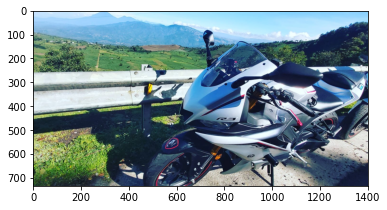

In [4]:
#Cargando y visualizando imagen a convertir
imagen = cv2.imread('ogh.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
plt.imshow(imagen)


#### 1.1) Si el parametro color vale 1, la imagen debe mostrar activos ´unicamente el color azul.

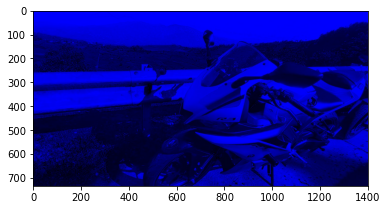

In [5]:
cambioImg(imagen,1)

#### 1.2) Si el parametro color vale 2, la imagen debe mostrar activos unicamente el color verde.

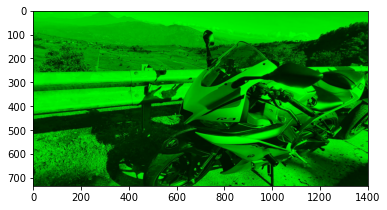

In [6]:
cambioImg(imagen,2)

#### 1.3) Si el parametro color vale 3, la imagen debe mostrar activos unicamente el color rojo.

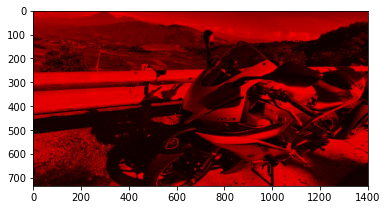

In [7]:
cambioImg(imagen,3)

#### 1.4) Si el parametro color vale 10, la imagen debe mostrar activos unicamente los colores rojo y verde.

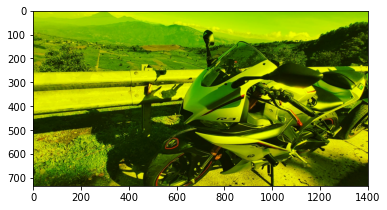

In [8]:
cambioImg(imagen,10)

#### 1.5) Si el parametro color vale 20, la imagen debe mostrar activos unicamente los colores verde y azul.

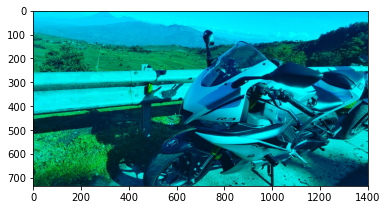

In [9]:
cambioImg(imagen,20)

#### 1.6) Si el parametro color vale 30, la imagen debe mostrar activos unicamente los colores azul y rojo.

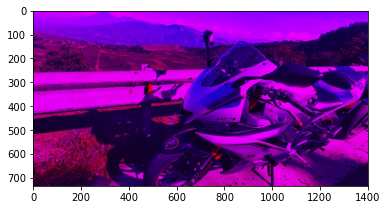

In [10]:
cambioImg(imagen,30)


### Problema 2:
#### En el .zip del laboratorio se le compartio un conjunto de imagenes en escala de grises (imagen1, imagen2, perro) imagenes fueron creadas utilizando una escala de grises en 3D, cree una funcion que dadas las 3 imagenes se construya la estas  imagen original a color.

### Problema 3:
#### Cree una funcion que dada una imagen cree una escala de grises en tres dimensiones, tome en cuenta que su funcion debe crear 3 imagenes como salida. Para entregar este ejercicio debe incluir una las imagenes que haya utilizado como prueba y el resultado de las misma, no puede utilizar la imagen del Problema #2.

In [11]:
imgen = cv2.imread("ogh1.jpg")

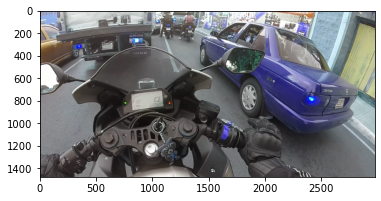

In [12]:
plt.imshow(imgen)
alto = imgen.shape[0]
ancho = imgen.shape[1]  
gray_green = np.zeros((alto,ancho,1))
gray_blue = np.zeros((alto,ancho,1))
gray_red = np.zeros((alto,ancho,1))
gray_aritmetica = np.zeros((alto,ancho,1))
gray_ponderado = np.zeros((alto,ancho,1))

In [14]:
for i in range(0,alto):
    for j in range(0,ancho):
        pixel = imgen[i,j]
        gray_blue[i,j] = pixel[2]
        gray_green[i,j] = pixel[1]
        gray_red[i,j] = pixel[0]
        
        gray_aritmetica[i,j] = np.mean(pixel)
        gray_ponderado[i,j] = int(0.299*pixel[2] + 0.587*pixel[1] + 0.114*pixel[0])

In [15]:
def writeAndShow(strImg, arrImg):
    cv2.imwrite(strImg, arrImg)
    imgTemp = cv2.imread(strImg)
    imgTemp = cv2.cvtColor(imgTemp, cv2.COLOR_BGR2RGB)
    plt.imshow(imgTemp)

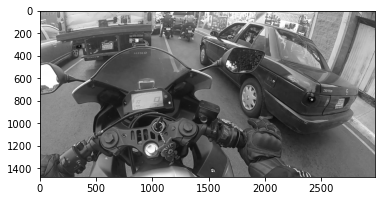

In [16]:
writeAndShow("gray_rojo.jpg",gray_red)

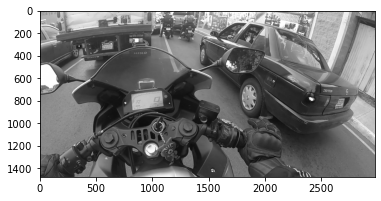

In [17]:
writeAndShow("gray_verde.jpg",gray_green)

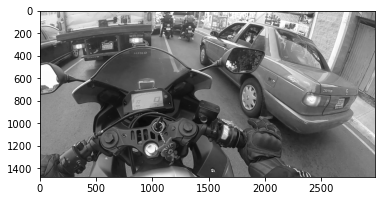

In [18]:
writeAndShow("gray_azul.jpg",gray_blue)

### Problema 4:
#### Cree una funcion que dada una imagen, muestre el histograma de cada canal de color y el de escala de grises (utilice un promedio aritmetico su escala de grises, no puede usar funciones de opencv), sus histogramas deben incluir una lınea vertical la cual muestre el valor de la media de lapara  distribucion.

In [26]:
#Dimensiones 
alto = imagen.shape[0]
ancho = imagen. shape[1]

In [27]:
media_ponderada = np.zeros((alto, ancho, 1)) #escala de grises

In [28]:
for i in range(0, alto):  #recorremos la imagen
    for j in range(0, ancho):
        pixel = imagen[i, j]

        blue = pixel[2]     ## en hojas de trqbajo es lo que va haber que cambiar
        green = pixel[1]
        red = pixel[0]
                                                #verde se usna mas, rojo menos y azul es intermedio.
        media_ponderada[i, j] = int(0.299*blue + 0.587*green + 0.114*red) # aca podemos jugar con la gama y contribucion de colo que deseeemos

In [30]:
from email.mime import image


cv2.imwrite("gris_imgp.jpg", media_ponderada)
imagen = cv2.imread('gris_imgp.jpg')
imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

In [32]:
imagen.shape

(734, 1402, 3)

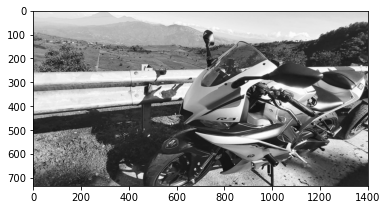

In [33]:
plt.imshow(imagen)
plt.show()

In [34]:
# funciones para operar
def grafic(img,tit):
    im=img
    fig, axs = plt.subplots(1,2, figsize=(35, 10))
    fig.suptitle(tit,fontsize=35)
    color = ('b', 'g', 'r') 
    
    for i, col in enumerate(color): 
        histr = cv2.calcHist([im],[i], None,[256],[0, 256])
        axs[1].set_title('Histograma',fontsize=20)
        axs[1].plot(histr, color = col)
        axs[1].axis(xmin=0,xmax=256)
    axs[0].set_title('Imagen',fontsize=20)
    axs[0].imshow(im, origin='upper')
    plt.show()
    return(None)

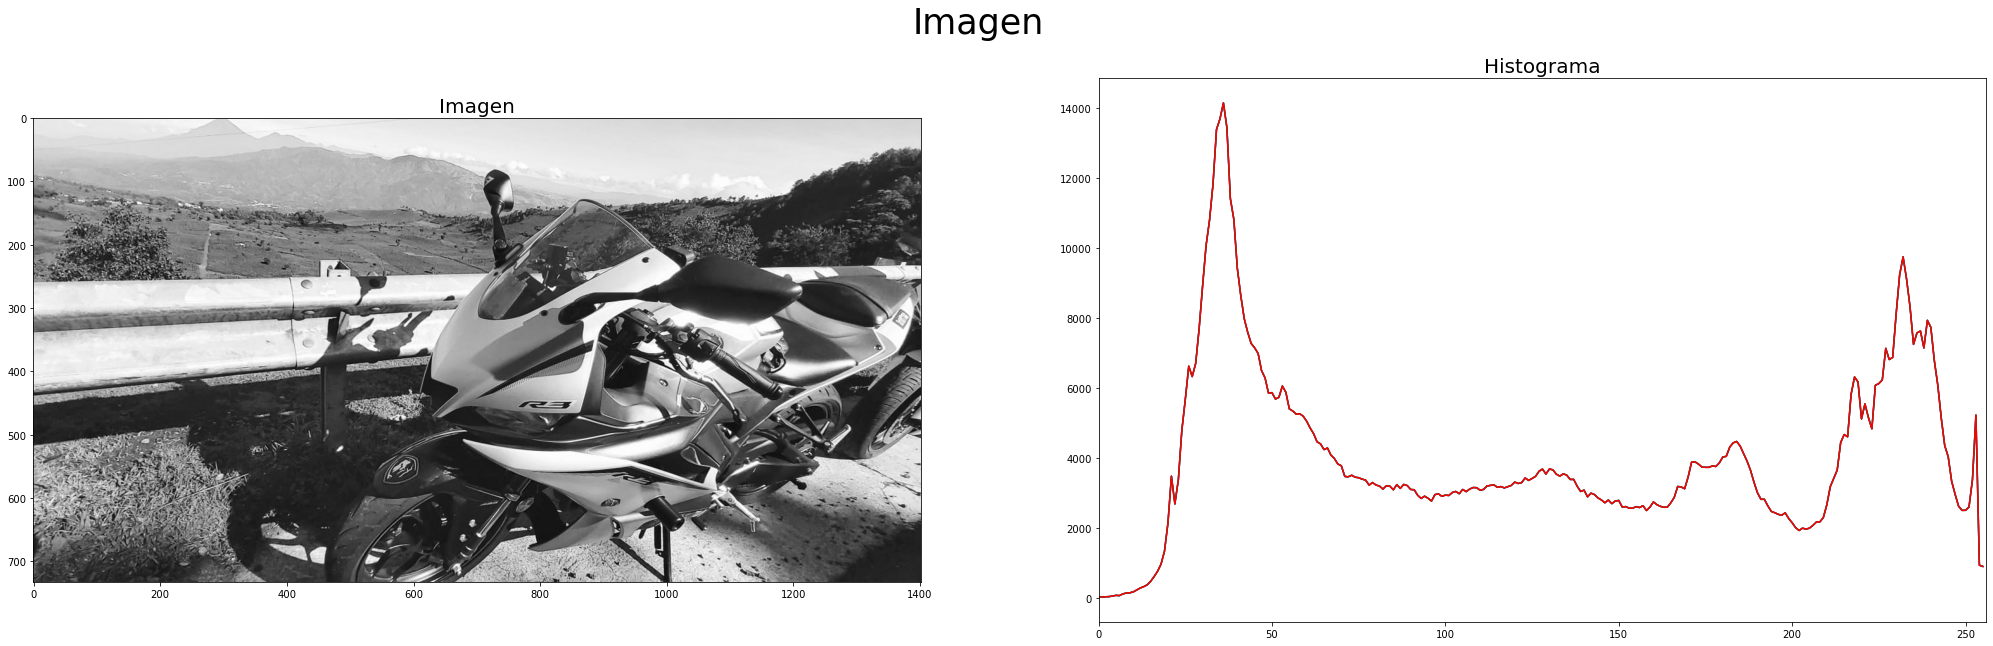

In [36]:
grafic(imagen,"Imagen")

### Problema 5:
#### Investigue en que consiste el enfoque de escala de grises ponderado, luego de esto implemente una funcion que dada una imagen, realice  una escala de grises ponderada (notar que no existe una solucion unica)

##### Definición gris En los modelos de imagen R, G y B, cuando R = G = B (cuando los valores de los tres componentes de color son iguales), entonces el color representa un color de escala de grises en este momento, donde el valor de R = G = B se denomina valor de escala de grises. En imágenes en escala de grises, los valores de escala de grises también pueden denominarse valores de brillo. Rango de valor gris 0-255.


##### Método de promedio ponderado Debido a que el ojo humano tiene una sensibilidad diferente a cada color, el ojo humano tiene la mayor sensibilidad al verde y la menor sensibilidad al azul, por lo que podemos usar el método de promedio ponderado para encontrar el valor de gris, la fórmula es la siguiente: f(x,y)=a_iR(i,j)+b_iG(i,j)+c_iB(i,j) f(x,y)=ai​R(i,j)+bi​G(i,j)+ci​B(i,j)

##### La nueva imagen g(x, y) se genera a base de hallar la mediana del conjunto formado por los píxeles de la imagen, en un entorno de vecindad del punto (x, y), repetidos tantas veces como se indique en la máscara h(u,v). Una máscara h(u,v) muy utilizada.


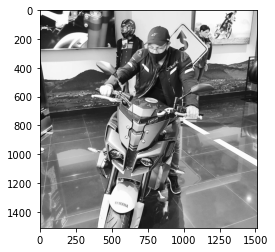

In [39]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('test.jpg')

R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(imgGray, cmap='gray')
plt.show()

### Problema 6: 
#### Investigue brevemente en que consiste el espacio de color HSV y como se mapean colores a dicho espacio


#### El modelo HSV es una matriz de stauracion y define un color con sus componentes.
#### Matiz: Se representa como un grado de ángulo cuyos valores posibles van de 0 a 360° (aunque para algunas aplicaciones se normalizan del 0 al 100%). Cada valor corresponde a un color. Ejemplos: 0 es rojo, 60 es amarillo y 120 es verde.
#### De forma intuitiva se puede realizar la siguiente transformación para conocer los valores básicos RGB:
#### Disponemos de 360 grados dónde se dividen los 3 colores RGB, eso da un total de 120º por color, sabiendo esto podemos recordar que el 0 es rojo RGB(1, 0, 0), 120 es verde RGB(0, 1, 0) y 240 es azul RGB(0, 0, 1). Para colores mixtos se utilizan los grados intermedios, el amarillo, RGB(1, 1, 0) está entre rojo y verde, por lo tanto 60º. Se puede observar como se sigue la secuencia de sumar 60 grados y añadir un 1 o quitar el anterior:0º = RGB(1, 0, 0)
#### •	60º = RGB(1, 1, 0)
#### •	120º = RGB(0, 1, 0)
#### •	180º = RGB(0, 1, 1)
#### •	240º = RGB(0, 0, 1)
#### •	300º = RGB(1, 0, 1)
#### •	360º = 0º

#### Saturacion: Se representa como la distancia al eje de brillo negro-blanco. Los valores posibles van del 0 al 100%. Cuanto menor sea la saturación de un color, mayor tonalidad grisácea habrá y más decolorado estará. Por eso es útil definir la insaturación como la inversa cualitativa de la saturación.
